__Name: Dan Shea__  
__Date: 2021-05-08__  

##### Problem Description
The function `CountingAnagrams(input_string)` take the `input_string` parameter and determines how many anagrams exist in the string.

An anagram is a new word that is produced from rearranging the characters in a different word.  

For example: cars and arcs are anagrams.  

Your program should determine how many anagrams exist in a given string and return the total number.  

For example: if str is "cars are very cool so are arcs and my os" then your program should return 2 because "cars" and "arcs" form 1 anagram and "so" and "os" form a 2nd anagram. The word "are" occurs twice in the string but it isn't an anagram because it is the same word just repeated. The string will contain only spaces and lowercase letters, no punctuation, numbers, or uppercase letters.

##### Examples
Input: cars are very cool so are arcs and my os
Output: 2

Input: aa aa odg dog gdo
Output: 2

Input: a c b c run urn urn
Output: 1

Input: mom omm mmo pop opp
Output: 3

In [1]:
def CountingAnagrams(input_string):
    # split the input string on the spaces into words
    words = input_string.split(' ')
    # Remove all words of length 1
    words = list(filter(lambda x: len(x) > 1, words))
    # Remove any duplicate words by converting to set and then back to list
    words = list(set(words))
    # Generate the sorted word for each word in the list
    sorted_words = [''.join(sorted(word)) for word in words]
    # For each sorted_word in the list, add it to a dict that contains a count
    word_counts = dict()
    for key in sorted_words:
        if key in word_counts:
            word_counts[key] += 1
        else:
            word_counts[key] = 0
    return sum(word_counts.values())

In [2]:
CountingAnagrams('cars are very cool so are arcs and my os')

In [3]:
CountingAnagrams('aa aa odg dog gdo')

2

In [4]:
CountingAnagrams('a c b c run urn urn')

1

In [5]:
CountingAnagrams('mom omm mmo pop opp')

3

##### Analysis of solution
We must sort each word in order to determine which words are anagrams of each other.  
This means we are bounded by the speed of the sort operation, which has a worst case performance of $O(n\ log\ n)$.  
_Note:_ if you are interested in the built-in sorting algorithm used in python, please refer to https://en.wikipedia.org/wiki/Timsort

##### Another less optimal solution given below
Another option is to construct counters of each string, which will take $O(n^{2})$ due to the `Counter` comparisons.  
When we sum up the equivalent Counters, we must be careful to avoid double-counting, which saves us some comparisons at the cost of making the code a bit more dense.

In [6]:
from collections import Counter

In [7]:
def CountingAnagramsTwo(input_string):
    # split the input string on the spaces into words
    words = input_string.split(' ')
    # Remove all words of length 1
    words = list(filter(lambda x: len(x) > 1, words))
    # Remove any duplicate words by converting to set and then back to list
    words = list(set(words))
    # Generate the Counter for each word in the list
    counters = [Counter(word) for word in words]
    # Store our sum
    total = 0
    # Compare counters for equivalence
    while counters:
        counter = counters.pop()
        for cmpcnt in counters[:]:
            if counter == cmpcnt:
                total += 1
                counters.remove(cmpcnt)
    return total

In [8]:
CountingAnagramsTwo('cars are very cool so are arcs and my os')

2

In [9]:
CountingAnagramsTwo('aa aa odg dog gdo')

2

In [10]:
CountingAnagramsTwo('a c b c run urn urn')

1

In [11]:
CountingAnagramsTwo('mom omm mmo pop opp')

3

##### Analysis of solution
Here, we again see that our solution works and we don't resort to sorting the strings.  
However, we should examine our code more closely to see what is going on in this function.

Let's use `'a c b c run urn urn'` as our sample input and step through the function.

We again first split the input into individual words based on the `' '` delimiter as defined by the problem.  

`['a', 'c', 'b', 'c', 'run', 'urn', 'urn']`

Then, we filter our input by removing any words of length 1 (as they will never have anagrams that are not just the word itself).  

`['run', 'urn', 'urn']`

The final filtering step is to remove any duplicate words by first converting to a `set` and then back to a `list`.  

`['run', 'urn', 'urn']` becomes `{'run', 'urn'}` and then `['run', 'urn']`

We then create a list of `Counter` objects for every word in the list.

`[Counter({'r': 1, 'u': 1, 'n': 1}), Counter({'u': 1, 'r': 1, 'n': 1})]`

The while loop then loops as long as there are elements in `counters`.

We call `pop()` which removes the tail of the list and places it into `counter`

`counter = Counter({'u': 1, 'r': 1, 'n': 1})` and `counters = [Counter({'r': 1, 'u': 1, 'n': 1})]`

And then, we use a for loop to iterate over a ___copy___ of the `counters` list (_i.e._ - `counters[:]`) and compare our `counter` variable to every element in the copy of the list.

We test to see if the `Counter` objects are equivalent (_i.e._ - are anagrams of each other), increasing our total if they are and then removing that matched anagram from our original list the while loop is checking the length of.

_Note:_ - the `remove()` method is actually removing the _first occurrence_ of the _value_ passed to it, but for our purposes this is acceptable as we are tallying how many equivalent `Counter` objects are present in the list.

So for our example input, the test is performed, the `Counter` objects are equivalent, total is updated to `total=1` and then the `Counter({'r': 1, 'u': 1, 'n': 1})` object is removed fomr the `counters` list.

When we return to the top of the while loop the list `counters` is now the empty list and the iteration ends.

The function then returns `total`, which has a value of 1.

##### Runtime introspection of the function
Below, I have added print statements to the function to illustrate the runtime behavior of the function.

In [12]:
def CountingAnagramsThree(input_string):
    print(f'Received "{input_string}" as input.')
    # split the input string on the spaces into words
    words = input_string.split(' ')
    print(f'words: {words}')
    # Remove all words of length 1
    words = list(filter(lambda x: len(x) > 1, words))
    print(f'filter len(x) < 1: {words}')
    # Remove any duplicate words by converting to set and then back to list
    words = list(set(words))
    print(f'remove duplicates: {words}')
    # Generate the Counter for each word in the list
    counters = [Counter(word) for word in words]
    print(f'counters: {counters}')
    # Store our sum
    total = 0
    print(f'total: {total}')
    # Compare counters for equivalence
    while counters:
        print('--')
        counter = counters.pop()
        print(f'counter: {counter}')
        for cmpcnt in counters[:]:
            print(f'compare to: {cmpcnt}')
            if counter == cmpcnt:
                total += 1
                print(f'total: {total}')
                counters.remove(cmpcnt)
                print(f'updated counters: {counters}')
        print('--')
    return total

In [13]:
CountingAnagramsThree('aa aa odg dog gdo')

Received "aa aa odg dog gdo" as input.
words: ['aa', 'aa', 'odg', 'dog', 'gdo']
filter len(x) < 1: ['aa', 'aa', 'odg', 'dog', 'gdo']
remove duplicates: ['odg', 'dog', 'aa', 'gdo']
counters: [Counter({'o': 1, 'd': 1, 'g': 1}), Counter({'d': 1, 'o': 1, 'g': 1}), Counter({'a': 2}), Counter({'g': 1, 'd': 1, 'o': 1})]
total: 0
--
counter: Counter({'g': 1, 'd': 1, 'o': 1})
compare to: Counter({'o': 1, 'd': 1, 'g': 1})
total: 1
updated counters: [Counter({'d': 1, 'o': 1, 'g': 1}), Counter({'a': 2})]
compare to: Counter({'d': 1, 'o': 1, 'g': 1})
total: 2
updated counters: [Counter({'a': 2})]
compare to: Counter({'a': 2})
--
--
counter: Counter({'a': 2})
--


2

In [14]:
CountingAnagramsThree('mom omm mmo pop opp')

Received "mom omm mmo pop opp" as input.
words: ['mom', 'omm', 'mmo', 'pop', 'opp']
filter len(x) < 1: ['mom', 'omm', 'mmo', 'pop', 'opp']
remove duplicates: ['pop', 'omm', 'mom', 'mmo', 'opp']
counters: [Counter({'p': 2, 'o': 1}), Counter({'m': 2, 'o': 1}), Counter({'m': 2, 'o': 1}), Counter({'m': 2, 'o': 1}), Counter({'p': 2, 'o': 1})]
total: 0
--
counter: Counter({'p': 2, 'o': 1})
compare to: Counter({'p': 2, 'o': 1})
total: 1
updated counters: [Counter({'m': 2, 'o': 1}), Counter({'m': 2, 'o': 1}), Counter({'m': 2, 'o': 1})]
compare to: Counter({'m': 2, 'o': 1})
compare to: Counter({'m': 2, 'o': 1})
compare to: Counter({'m': 2, 'o': 1})
--
--
counter: Counter({'m': 2, 'o': 1})
compare to: Counter({'m': 2, 'o': 1})
total: 2
updated counters: [Counter({'m': 2, 'o': 1})]
compare to: Counter({'m': 2, 'o': 1})
total: 3
updated counters: []
--


3

##### Our less optimal solution is $O(n^{2})$
We can see from the runtime analysis, that our updated solution is $O(n^{2})$.  

A key take-away from this is that the nested `for` loop is ___operating on a copy___ because we are modifying the list as we iterate over it.  

The outer `while` loop is testing the length of the list and removing a single element each iteration.  
However, the inner `for` loop _modifies that list_ by removing matching elements and therefore we _must operate on a copy_ to ensure that every element is compared to the first element we popped off the list at the beginning of the `while` loop.

##### Best case is $O(n)$
For example, if we had passed a list where every word was an anagram of every other word we would compare the first element to every other element in the first for loop and remove those elements as we went. The outer `while` loop would therefore only execute once. And we would perform $n-1$ comparisons and return $n-1$ as our total. (See below)

In [15]:
CountingAnagramsThree('barb arbb rbba bbar brab')

Received "barb arbb rbba bbar brab" as input.
words: ['barb', 'arbb', 'rbba', 'bbar', 'brab']
filter len(x) < 1: ['barb', 'arbb', 'rbba', 'bbar', 'brab']
remove duplicates: ['brab', 'arbb', 'bbar', 'barb', 'rbba']
counters: [Counter({'b': 2, 'r': 1, 'a': 1}), Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'r': 1, 'a': 1})]
total: 0
--
counter: Counter({'b': 2, 'r': 1, 'a': 1})
compare to: Counter({'b': 2, 'r': 1, 'a': 1})
total: 1
updated counters: [Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'a': 1, 'r': 1})]
compare to: Counter({'b': 2, 'a': 1, 'r': 1})
total: 2
updated counters: [Counter({'b': 2, 'a': 1, 'r': 1}), Counter({'b': 2, 'a': 1, 'r': 1})]
compare to: Counter({'b': 2, 'a': 1, 'r': 1})
total: 3
updated counters: [Counter({'b': 2, 'a': 1, 'r': 1})]
compare to: Counter({'b': 2, 'a': 1, 'r': 1})
total: 4
updated counters: []
--


4

##### Worst case is $O(n^{2})$
In our worst case, where no words are anagrams of each other, we have compare every word's `Counter` to every other word's `Counter` in the list.

In [16]:
CountingAnagramsThree('there is no anagram here')

Received "there is no anagram here" as input.
words: ['there', 'is', 'no', 'anagram', 'here']
filter len(x) < 1: ['there', 'is', 'no', 'anagram', 'here']
remove duplicates: ['anagram', 'here', 'is', 'there', 'no']
counters: [Counter({'a': 3, 'n': 1, 'g': 1, 'r': 1, 'm': 1}), Counter({'e': 2, 'h': 1, 'r': 1}), Counter({'i': 1, 's': 1}), Counter({'e': 2, 't': 1, 'h': 1, 'r': 1}), Counter({'n': 1, 'o': 1})]
total: 0
--
counter: Counter({'n': 1, 'o': 1})
compare to: Counter({'a': 3, 'n': 1, 'g': 1, 'r': 1, 'm': 1})
compare to: Counter({'e': 2, 'h': 1, 'r': 1})
compare to: Counter({'i': 1, 's': 1})
compare to: Counter({'e': 2, 't': 1, 'h': 1, 'r': 1})
--
--
counter: Counter({'e': 2, 't': 1, 'h': 1, 'r': 1})
compare to: Counter({'a': 3, 'n': 1, 'g': 1, 'r': 1, 'm': 1})
compare to: Counter({'e': 2, 'h': 1, 'r': 1})
compare to: Counter({'i': 1, 's': 1})
--
--
counter: Counter({'i': 1, 's': 1})
compare to: Counter({'a': 3, 'n': 1, 'g': 1, 'r': 1, 'm': 1})
compare to: Counter({'e': 2, 'h': 1, 'r

0

This results in $\sum_{i=1}^{N-1} \equiv \frac{N(N-1)}{2}$ comparisons being performed.

##### We can examine the worst case complexities of each by plotting them in matplotlib.

In [17]:
from matplotlib import pyplot as plt
import numpy as np

In [18]:
%matplotlib inline

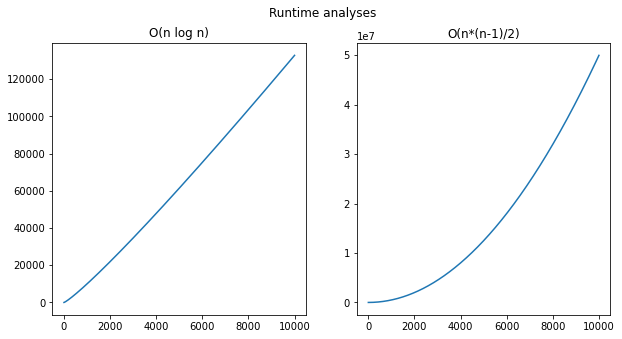

In [19]:
fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Runtime analyses')
x=range(1,10000)
y=np.array(list(map(lambda n: n*(np.log2(n)), x)))
axs[0].set_title('O(n log n)')
axs[0].plot(x, y)
y2 = np.array(list(map(lambda n: n*(n-1) / 2, x)))
axs[1].set_title('O(n*(n-1)/2)')
axs[1].plot(x, y2)